# Document Splitters and Chunkers in LangChain
* Notebook by Adam Lang
* Date: 7/3/2024

## Document Splitters and Chunkers
* LangChain supports various document splitting and chunking mechanisms for transforming documents.
* **LLM context window is the reason for splitting documents into smaller chunks or paragraphs.**
* Documents can be split by various methods including but not limited to:
1. sections
2. character count
3. token counts

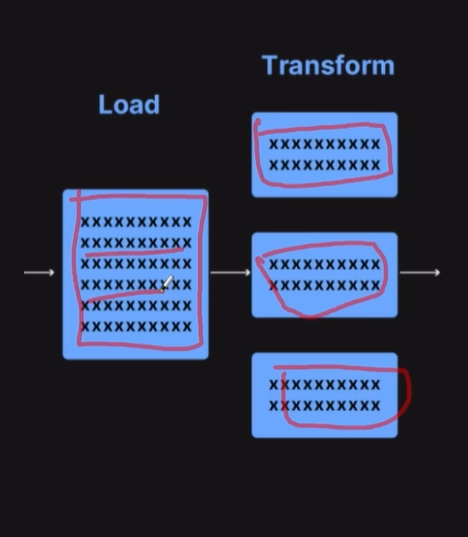

* Chunking is the immediate step after Loading.

## How does a Splitter work?
* Text splitter works as follows:
1. Split text into small, semantically meaningful chunks.
2. Combine these small chunks into a larger chunk until you reach a certain size based on character count or token count.
3. Once the appropriate size is reached, you make the chunk its own piece of text an then create new chunks of text with or without chunk overlaps.

* Key aspects of splitting:
1. **Splitting strategy** -
  * Character - number of characters (e.g. 3000)
  * Tokens - number of 100 tokens
  * Semantic - chunk based on titles or heading sections of documents
  * Sectional
  * ...etc...
2. **Chunk size measurement**
  * Character count
  * Token count

## Common Splitters in LangChain

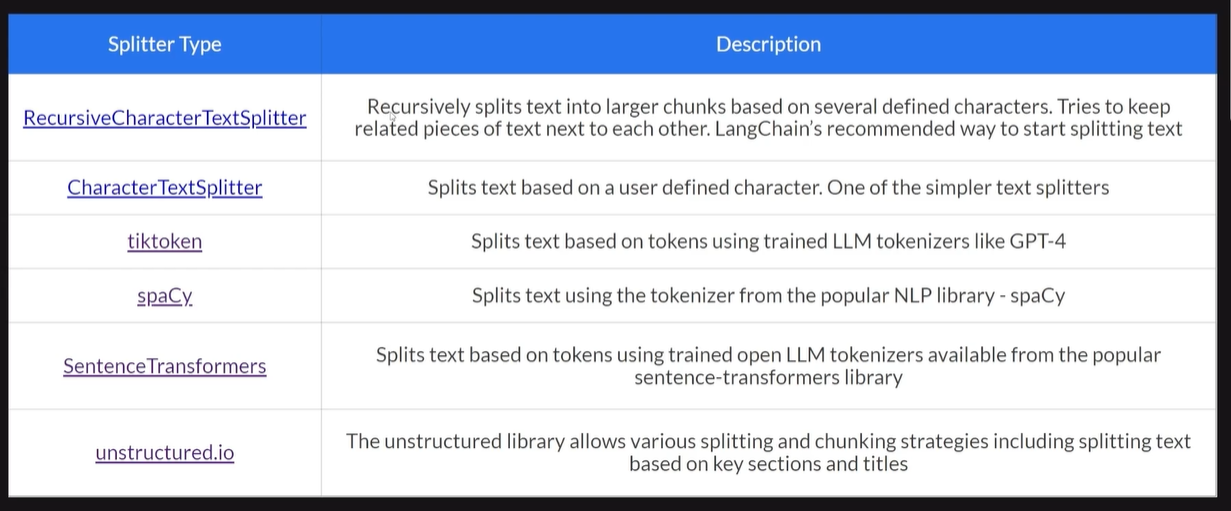

# Experimenting with Different Document Splitters and Chunkers in LangChain



## Install OpenAI, HuggingFace, LangChain

In [1]:
!pip install langchain==0.2.0
!pip install langchain-openai==0.1.7
!pip install langchain-community==0.2.0

In [2]:
## unstructured.io library
!pip install "unstructured[all-docs]==0.14.0"

## Note: Restart session after installing!

In [3]:
# OCR dependencies for unstructured.io
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (18.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

## Install the text splitters

In [4]:
!pip install langchain-text-splitters==0.2.0
!pip install tiktoken==0.7.0
!pip install spacy
!pip install sentence-transformers==2.7.0

  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.2.2
    Uninstalling langchain-text-splitters-0.2.2:
      Successfully uninstalled langchain-text-splitters-0.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.5 MB/s eta 0:00:00


# Document Splitting and Chunking
* Document Splitting Workflow
1. Split into Chunks
  * Break text into small, semantically meaningful units (e.g. sentences)
2. Combine Chunks
  * Assemble the smaller units into larger chunks until they reach a predefined size.
  * The size is determined by a specific measurement function.
3. Create Overlapping Chunks
  * Once the maximum size is reached, finalize the chunk as an independent text piece.
  * Begin a new chunk, incorporating some overlap with previous chunk to maintain textual content.

**The goal is to make sure that we keep semantically related text together which is absolutely crucial for downstream tasks such as embeddings and LLM queries.**

## `RecursiveCharacterTextSplitter`
* This splits text based on a list of characters.
* This splitter can handle various requirements through parameters that are adjustable.
* This is the **recommended generic text splitter**. Why?
   * Parameterizes by a list of characters.
   * Can split by multiple characters at same time not just one.
   * Splits characters in order until chunks are small enough.
   * The default character list is: `["\n\n","\n"," ",""]`
   * This will attempt to keep all paragraphs and thus associated words and sentences together for as long as possible during the splitting process.
      * This is by default as paragraphs usually contain semantically similar information that is relevant.

### Features and Parameters
* **Character List**
   * Uses a specified list of characters to determine where splits occur.
* **Chunk Size**
   * Allows user to set size of each chunk which helps to ensure chunks are manageable and fit the LLM context window.
* **Overlap**
   * Configurable overlap between consecutive chunks to maintain context continuity across chunks.

**`RecursiveCharacterTextSplitter` is very useful for text/documents where precise control over splitting criteria is necessary, thus allowing for customized chunking strategies based on specific standard characters.**

* Source of text below: https://www.visitnewengland.com/all/me-lobster-lighthouses-beaches-york-region/

In [7]:
# import the splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter

# text to experiment with
doc = """The southernmost towns of Maine are deliciously cozy place to retreat for glorious beaches, classic family summer fun, good food or romance. The famous South Coast beaches, are a magnet for sunbathers, swimmers, and anyone who loves the beauty of sand and surf. Get out in the evening for dinner on the oceanfront, for the sunset or to see the stars light up the night before heading back to your beachfront suite.
The coastline is a place of ongoing maritime activity and history. Charter boats for sailing, sightseeing, or fishing can be found at marinas and harbors in Kittery and York Harbor, ME. The bounty of the sea can be found at harbor markets and restaurants everywhere nearby. Lighthouses dating to the early and mid-19th century dot the landscape, helping to mark the seasons and guide those traveling on the sea.

The first towns across the state line from New Hampshire are Kittery and Eliot, ME. Kittery is on the ocean and hosts several beaches (Crescent, Seapoint, and at Fort Foster Park), historic colonial sites including Forts Foster and McClary, classic New England waterfront areas and architecture like that found along Pepperell Cove, great outlet shopping, and, of course, classic New England dining and resorts. Eliot is slightly inland along the Piscataqua River, a small town of farms and outdoor beauty.

You don't have to travel very far across the Maine-New Hampshire border to find great outlet shopping, because the Kittery Outlets are right there on Route 1 in Kittery, ME. With over 120 shops featuring name-brand clothing, accessories, shoes, jewelry, candles, collectibles and other novelties, edible delights, and several great restaurants, you're sure to find the perfect item for yourself or to offer as a gift.


"""

In [8]:
# print document
print(doc)

The southernmost towns of Maine are deliciously cozy place to retreat for glorious beaches, classic family summer fun, good food or romance. The famous South Coast beaches, are a magnet for sunbathers, swimmers, and anyone who loves the beauty of sand and surf. Get out in the evening for dinner on the oceanfront, for the sunset or to see the stars light up the night before heading back to your beachfront suite.
The coastline is a place of ongoing maritime activity and history. Charter boats for sailing, sightseeing, or fishing can be found at marinas and harbors in Kittery and York Harbor, ME. The bounty of the sea can be found at harbor markets and restaurants everywhere nearby. Lighthouses dating to the early and mid-19th century dot the landscape, helping to mark the seasons and guide those traveling on the sea.

The first towns across the state line from New Hampshire are Kittery and Eliot, ME. Kittery is on the ocean and hosts several beaches (Crescent, Seapoint, and at Fort Foste

Splitting with smaller chunk size (total characters) makes more paragraphs.

In [9]:
text_splitter = RecursiveCharacterTextSplitter(
    separators = ["\n\n", "\n", " ", ""], #separate by paragraphs, extra lines, spaces
    chunk_size=300, #300 characters
    chunk_overlap=0, # no overlapping words between chunks
)

In [10]:
# split text
texts = text_splitter.split_text(doc)

# print length
print(len(texts))

8


Now we have 8 chunks.

In [11]:
# loop through and print chunks
for text in texts:
  print(text)
  print(len(text))
  print()

The southernmost towns of Maine are deliciously cozy place to retreat for glorious beaches, classic family summer fun, good food or romance. The famous South Coast beaches, are a magnet for sunbathers, swimmers, and anyone who loves the beauty of sand and surf. Get out in the evening for dinner on
298

the oceanfront, for the sunset or to see the stars light up the night before heading back to your beachfront suite.
115

The coastline is a place of ongoing maritime activity and history. Charter boats for sailing, sightseeing, or fishing can be found at marinas and harbors in Kittery and York Harbor, ME. The bounty of the sea can be found at harbor markets and restaurants everywhere nearby. Lighthouses dating to the
299

early and mid-19th century dot the landscape, helping to mark the seasons and guide those traveling on the sea.
111

The first towns across the state line from New Hampshire are Kittery and Eliot, ME. Kittery is on the ocean and hosts several beaches (Crescent, Seapoint

Splitting with larger chunk size (total characters) makes less paragraphs

In [12]:
text_splitter = RecursiveCharacterTextSplitter(
    separators = ["\n\n", "\n", " ", ""],
    chunk_size = 500, # increased chunk_size
    chunk_overlap = 0, #no overlap in chunks
)


# split into larger chunks
texts = text_splitter.split_text(doc)
print(len(texts))

5


Now we have 5 chunks instead of 8.

In [13]:
# print the chunks
for text in texts:
  print(text)
  print(len(text))
  print()

The southernmost towns of Maine are deliciously cozy place to retreat for glorious beaches, classic family summer fun, good food or romance. The famous South Coast beaches, are a magnet for sunbathers, swimmers, and anyone who loves the beauty of sand and surf. Get out in the evening for dinner on the oceanfront, for the sunset or to see the stars light up the night before heading back to your beachfront suite.
414

The coastline is a place of ongoing maritime activity and history. Charter boats for sailing, sightseeing, or fishing can be found at marinas and harbors in Kittery and York Harbor, ME. The bounty of the sea can be found at harbor markets and restaurants everywhere nearby. Lighthouses dating to the early and mid-19th century dot the landscape, helping to mark the seasons and guide those traveling on the sea.
411

The first towns across the state line from New Hampshire are Kittery and Eliot, ME. Kittery is on the ocean and hosts several beaches (Crescent, Seapoint, and at F

Summary:
* We may have to adjust the chunk size here because 1 chunk as we can see the 4th chunk has 7 characters with only the word "beauty".
* However, we can mitigate information loss by using `chunk_overlap`. This is very useful when context is quite often divided between chunks.

In [14]:
# use overlap in splitter
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=300,
    chunk_overlap=100
)

# split the text with overlap
texts = text_splitter.split_text(doc)
print(len(texts))

9


Now there are 9 chunks, but these contain more semantic information.

In [15]:
# print the chunks
for text in texts:
  print(text)
  print(len(text))
  print()

The southernmost towns of Maine are deliciously cozy place to retreat for glorious beaches, classic family summer fun, good food or romance. The famous South Coast beaches, are a magnet for sunbathers, swimmers, and anyone who loves the beauty of sand and surf. Get out in the evening for dinner on
298

swimmers, and anyone who loves the beauty of sand and surf. Get out in the evening for dinner on the oceanfront, for the sunset or to see the stars light up the night before heading back to your beachfront suite.
212

The coastline is a place of ongoing maritime activity and history. Charter boats for sailing, sightseeing, or fishing can be found at marinas and harbors in Kittery and York Harbor, ME. The bounty of the sea can be found at harbor markets and restaurants everywhere nearby. Lighthouses dating to the
299

the sea can be found at harbor markets and restaurants everywhere nearby. Lighthouses dating to the early and mid-19th century dot the landscape, helping to mark the seasons

You can also create LangChain `Document` chunks with the `create_documents` function.

In [17]:
# create splitter
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=500,
    chunk_overlap=100,
)

In [18]:
# create LangChain documents
docs = text_splitter.create_documents([doc])
docs

[Document(page_content='The southernmost towns of Maine are deliciously cozy place to retreat for glorious beaches, classic family summer fun, good food or romance. The famous South Coast beaches, are a magnet for sunbathers, swimmers, and anyone who loves the beauty of sand and surf. Get out in the evening for dinner on the oceanfront, for the sunset or to see the stars light up the night before heading back to your beachfront suite.'),
 Document(page_content='The coastline is a place of ongoing maritime activity and history. Charter boats for sailing, sightseeing, or fishing can be found at marinas and harbors in Kittery and York Harbor, ME. The bounty of the sea can be found at harbor markets and restaurants everywhere nearby. Lighthouses dating to the early and mid-19th century dot the landscape, helping to mark the seasons and guide those traveling on the sea.'),
 Document(page_content='The first towns across the state line from New Hampshire are Kittery and Eliot, ME. Kittery is 

Summary:
* LangChain documents are useful when you want to store metadata with the chunks.

## `CharacterTextSplitter`
* The CharacterTextSplitter is used for dividing text on specified characters.
* It is very simple and very effective allowing custom control over specific text segments.

### Key Features and Parameters
* **Split Character**: by default, uses an empty string character ("") to split the text, but this can be customized to any character you specify.
* **Chunk Size**: allows you to define the length of each chunk in terms of the number of characters. This is very userful for ensuring each chunk of text is manageable for processing.
* **Overlap**: set the amount of overlap between consecutive chunks. This will help maintain context and continuation when text is split into separate parts.

**This is the simplest text splitter that LangChain offers**
* character-based division
* straight forward chunk lengths and overlap
* string content is simply obtained via `.split_text`
* To create LangChain `Document` objects (e.g. for use in downstream tasks) use `.create_documents`

In [20]:
# import splitter
from langchain.text_splitter import CharacterTextSplitter

# create splitter
text_splitter = CharacterTextSplitter(
    separator="\n", #only 1 character to separate on
    chunk_size=550,
    chunk_overlap=200,
    is_separator_regex=False, #no regex split
)

# create LangChain documents
docs = text_splitter.create_documents([doc])
docs

[Document(page_content='The southernmost towns of Maine are deliciously cozy place to retreat for glorious beaches, classic family summer fun, good food or romance. The famous South Coast beaches, are a magnet for sunbathers, swimmers, and anyone who loves the beauty of sand and surf. Get out in the evening for dinner on the oceanfront, for the sunset or to see the stars light up the night before heading back to your beachfront suite.'),
 Document(page_content='The coastline is a place of ongoing maritime activity and history. Charter boats for sailing, sightseeing, or fishing can be found at marinas and harbors in Kittery and York Harbor, ME. The bounty of the sea can be found at harbor markets and restaurants everywhere nearby. Lighthouses dating to the early and mid-19th century dot the landscape, helping to mark the seasons and guide those traveling on the sea.'),
 Document(page_content='The first towns across the state line from New Hampshire are Kittery and Eliot, ME. Kittery is 

## Code Splitters
* `RecursiveCharacterTextSplitter` includes pre-built lists of separators that are useful for splitting text in a particular programming language of choice.

In [22]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language

# code
python_code = """
class FragmentRetriever:
    def __init__(
        self,
        biencoder_model: KnownEncoderModel = KnownEncoderModel.BGE,
        crossencoder_model: KnownEncoderModel = KnownEncoderModel.QNLI_ROBERTA,
    ):
        self.biencoder = config.biencoding_model(biencoder_model)
        self.crossencoder = config.crossencoding_model(crossencoder_model)

    async def raw_vector_search(self, query: str, num_results: int = 100) -> list[VectorSearchResult]:
        # Encode the input text
        input_vector = self.biencoder.encode(query).tolist()
        # Search for similar fragments
        results = await Fragment.vector_search(input_vector, num_results=num_results)
        return results

    def rerank_search_results(self, query: str, search_results: list[VectorSearchResult]) -> VectorSearchResult:
        text_pairs = [[query, result.text] for result in search_results]
        rerank_scores = self.crossencoder.predict(text_pairs)
        for result, rerank_score in zip(search_results, rerank_scores):
            result.rerank_score = rerank_score
        return sorted(search_results, key=lambda x: x.rerank_score, reverse=True)

    DEFAULT_RAW_RESULT_FACTOR = 3  # By default, get 3x as many raw results as requested before reanking 🤷🏼‍♂️

    async def retrieve(
        self, query: str, num_results: int = 10, num_raw_results: int | None = None
    ) -> list[VectorSearchResult]:
        if num_raw_results is None:
            num_raw_results = num_results * self.DEFAULT_RAW_RESULT_FACTOR
        raw_results = await self.raw_vector_search(query, num_results=num_raw_results)
        reranked_results = self.rerank_search_results(query, raw_results)
        return reranked_results[:num_results]


"""

# splitter
python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON,
    chunk_size=50,
    chunk_overlap=0
)

# create documents in LangChain
python_docs = python_splitter.create_documents([python_code])
python_docs

[Document(page_content='class FragmentRetriever:\n    def __init__('),
 Document(page_content='self,'),
 Document(page_content='biencoder_model: KnownEncoderModel ='),
 Document(page_content='KnownEncoderModel.BGE,'),
 Document(page_content='crossencoder_model: KnownEncoderModel ='),
 Document(page_content='KnownEncoderModel.QNLI_ROBERTA,'),
 Document(page_content='):'),
 Document(page_content='self.biencoder ='),
 Document(page_content='config.biencoding_model(biencoder_model)'),
 Document(page_content='self.crossencoder ='),
 Document(page_content='config.crossencoding_model(crossencoder_model)'),
 Document(page_content='async def raw_vector_search(self, query: str,'),
 Document(page_content='num_results: int = 100) ->'),
 Document(page_content='list[VectorSearchResult]:'),
 Document(page_content='# Encode the input text'),
 Document(page_content='input_vector ='),
 Document(page_content='self.biencoder.encode(query).tolist()'),
 Document(page_content='# Search for similar fragments'

## Markdown Splitters
* Chunking a document based on document structure.
* Markdown files are organized by **headers**.
* To organize and keep the header organization in a semantic manner, we can use the `MarkdownHeaderTextSplitter`.
  * This splits a markdown file by specified set of headers.

* As an example:




```
markdown_document = """
# Team Introductions

## Management Team

Hi, this is Jim, the CEO.  
Hi, this is Joe, the CFO.

## Development Team

Hi, this is Molly, the Lead Developer.
"""
```

We can specify the headers to split on:

```
[("#", "Header 1"),
 ("##", "Header 2")]
```

And content is grouped or split by common headers:

```
Document(page_content='Hi, this is Jim, the CEO.\nHi, this is Joe, the CFO.',
metadata={'Header 1': 'Team Introductions', 'Header 2': 'Management Team'})

Document(page_content='Hi, this is Molly, the Lead Developer.',
metadata={'Header 1': 'Team Introductions', 'Header 2': 'Development Team'})
```

In [28]:
markdown_document = """
# Team Introductions

## Management Team
Hi, this is Jim, the CTO.
Hi, this is Anna, the CEO.

## Development Team
Hi, this is Molly, the Lead Engineer.


"""

In [29]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

# section headings to split on
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(metadata={'Header 1': 'Team Introductions', 'Header 2': 'Management Team'}, page_content='Hi, this is Jim, the CTO.\nHi, this is Anna, the CEO.'),
 Document(metadata={'Header 1': 'Team Introductions', 'Header 2': 'Development Team'}, page_content='Hi, this is Molly, the Lead Engineer.')]

By default, `MarkdownHeaderTextSplitter` strips headers being split on the output chunk's content.
  * This can be disabled by setting `strip_headers = False`

In [30]:
markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on, strip_headers=False) #set to false
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(metadata={'Header 1': 'Team Introductions', 'Header 2': 'Management Team'}, page_content='# Team Introductions  \n## Management Team\nHi, this is Jim, the CTO.\nHi, this is Anna, the CEO.'),
 Document(metadata={'Header 1': 'Team Introductions', 'Header 2': 'Development Team'}, page_content='## Development Team\nHi, this is Molly, the Lead Engineer.')]

### Tokenizer based Splitting

* LLMs have a token limit. You should not exceed the token limit.
* When you split your text into chunks it is therefore a good idea to count the number of tokens.
* There are many tokenizers. When you count tokens in your text you should use the same tokenizer as used in the language model.
* Let's look at how we can chunk documents using different tokenizers


#### tiktoken splitters

* [`tiktoken`](https://github.com/openai/tiktoken) is a fast BPE tokenizer created by OpenAI.

* We can use tiktoken to estimate tokens used.
  * It will probably be more accurate for the OpenAI models.
  * We measure the `chunk_size`here based on the number of tokens typically and **not the number of characters.**

* For Open AI models, roughly 1 token = 3\4 of a word.
  * This means that approximately 100 tokens ~= 75 words.



We can load a `TokenTextSplitter` which works with `tiktoken` directly and will ensure each split is smaller than chunk size in terms of the number of tokens.

In [31]:
# text --we will use some text from visitnewengland.com
doc = """
Bar Harbor is the largest town on Mount Desert Island. Many visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands. Bar Harbor has plenty to do if you want to enjoy a day in town. There is dining (with an emphasis on lobster and blueberries, of course). And shopping at many interesting boutiques offering the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons. Craft beers? We won’t hide them from you.

The park has two museums. Islesford Historical Museum is on Little Cranberry Island, open mid-June to August 31. Sieur de Monts Spring and Nature Center are located two miles south of Bar Harbor near the juncture of Park Loop Road and Route 3. The nature center is open May to October. Adjacent to the nature center are the Wild Gardens of Acadia, which display 300 native species of the area nine labeled areas. The gardens are open year-round. Also at this location is the Abbe Museum, which preserves the culture of local Native American tribes (This museum is open during the warm seasons; another branch of the Abbe Museum, in downtown Bar Harbor, is open all year).

There are so many things to do in this beautiful part of the world. Here’s a quick overview.

Visit a Lighthouse:
Bass Harbor Head Light is the only lighthouse on Mount Desert Island. The lighthouse has short trails on either side that provide spectacular views.

Bicycling:
Carriage Roads that wind through the park have crushed rock surfaces that are ideal perfect for bicycling. Cyclists share these roads with horses and pedestrians. Bicycling is not permitted on hiking trails.

Editor’s Choice – Acadia National Park in Maine - Things To Do
Birdwatching:
Popular areas for this activity are Sieur de Monts Springs, Bear Brook and Beaver Dam Pond, Precipice, Otter Point, Seawall Picnic Area, Wonderland and Ship Harbor, Schoodic Peninsula, and Cadillac Mountain.

Boating:
A number of lakes and ponds on Mount Desert Island permit boating.

Climbing:
At Otter Cliffs, the park maintains fixed anchors on top that must be used instead of trees to belay several climbs. Climbers at Great Head and Otter Cliff should know tides and weather forecasts; climbing at these areas is more difficult and dangerous at high tide or in heavy seas.

EarthCache Program:
Use your GPS and provided clues to search for and find multiple EarthCaches. The Story of Glaciers will get you started.

Fishing:
Acadia National Park offers freshwater and saltwater fishing. Lakes and ponds may have trout, landlocked salmon, smallmouth and largemouth bass. Ocean species include mackerel, bluefish, and striped bass. Freshwater fishing requires a state fishing license; ocean fishing does not.

Hiking:
Maps provided by the park describes several historic hiking trails.

Horseback Riding:
Most of the park’s 45 miles of carriage roads are available for horseback travel. Get a copy of the Carriage Road User's Map to identify the routes where horses are permitted.

Scenic Drives:
The scenic 27-mile scenic loop begins at Hulls Cove Visitor Center and offers access to Sand Beach, Thunder Hole, Otter Cliffs, Jordan Pond, and Cadillac Mountain.

Swimming:
Two park beaches are staffed with lifeguards during the summer. They are Sand Beach with ocean swimming in 55 F-degree water and Echo Lake Beach, with somewhat warmer water.

Tidepooling:
Bar Island Sand Bar is great for young children. Accessible off Bridge Street for about 1.5 hours on either side of low tide. Also try Ship Harbor and Wonderland west side of Mount Desert Island.

"""


In [33]:
from langchain_text_splitters import TokenTextSplitter

# text splitter creation
text_splitter = TokenTextSplitter(model_name='gpt-3.5-turbo', # split text as the same model listed here would
                                  chunk_size=30, # chunk size is tokens not text
                                  chunk_overlap=10)


# create documents
docs = text_splitter.create_documents([doc])

In [34]:
# length
len(docs)

40

In [35]:
docs

[Document(page_content='\nBar Harbor is the largest town on Mount Desert Island. Many visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands.'),
 Document(page_content=' while exploring Acadia National Park and nearby islands. Bar Harbor has plenty to do if you want to enjoy a day in town. There is dining ('),
 Document(page_content=' enjoy a day in town. There is dining (with an emphasis on lobster and blueberries, of course). And shopping at many interesting boutiques offering'),
 Document(page_content=' course). And shopping at many interesting boutiques offering the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise'),
 Document(page_content=' a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an oceanarium, a zoo and a popular lumberjack'),
 Document(page_content=' oceanarium, a zoo and a popular lumberjack show during the warm seasons. Craft beers? We won’t hide them from yo

In [36]:
## now use tiktoken
import tiktoken

enc = tiktoken.encoding_for_model('gpt-3.5-turbo')

## using this block we can count the len of each document using every token
for i in docs:
  print('Words:', len(i.page_content.split(' ')),
        'Tokens:', len(enc.encode(i.page_content)),
        'Chunk:', i.page_content)

Words: 26 Tokens: 30 Chunk: 
Bar Harbor is the largest town on Mount Desert Island. Many visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands.
Words: 28 Tokens: 30 Chunk:  while exploring Acadia National Park and nearby islands. Bar Harbor has plenty to do if you want to enjoy a day in town. There is dining (
Words: 25 Tokens: 30 Chunk:  enjoy a day in town. There is dining (with an emphasis on lobster and blueberries, of course). And shopping at many interesting boutiques offering
Words: 26 Tokens: 30 Chunk:  course). And shopping at many interesting boutiques offering the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise
Words: 25 Tokens: 30 Chunk:  a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an oceanarium, a zoo and a popular lumberjack
Words: 23 Tokens: 30 Chunk:  oceanarium, a zoo and a popular lumberjack show during the warm seasons. Craft beers? We won’t hide them

Larger chunk size in terms of number of words/tokens will create lesser chunks or paragraphs as usual.

In [37]:
text_splitter = TokenTextSplitter(model_name='gpt-3.5-turbo',
                                  chunk_size=100,
                                  chunk_overlap=30)

# create docs
docs = text_splitter.create_documents([doc])

In [38]:
len(docs)

11

In [39]:
docs

[Document(page_content='\nBar Harbor is the largest town on Mount Desert Island. Many visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands. Bar Harbor has plenty to do if you want to enjoy a day in town. There is dining (with an emphasis on lobster and blueberries, of course). And shopping at many interesting boutiques offering the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an'),
 Document(page_content=' the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons. Craft beers? We won’t hide them from you.\n\nThe park has two museums. Islesford Historical Museum is on Little Cranberry Island, open mid-June to August 31. Sieur de Monts Spring and Nature Center are located two miles south of Bar Harbor'),
 Document(page_content='

In [40]:
enc = tiktoken.encoding_for_model('gpt-3.5-turbo')


## using this block we can count the len of each document using every token
for i in docs:
  print('Words:', len(i.page_content.split(' ')),
        'Tokens:', len(enc.encode(i.page_content)),
        'Chunk:', i.page_content)

Words: 86 Tokens: 100 Chunk: 
Bar Harbor is the largest town on Mount Desert Island. Many visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands. Bar Harbor has plenty to do if you want to enjoy a day in town. There is dining (with an emphasis on lobster and blueberries, of course). And shopping at many interesting boutiques offering the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an
Words: 79 Tokens: 100 Chunk:  the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons. Craft beers? We won’t hide them from you.

The park has two museums. Islesford Historical Museum is on Little Cranberry Island, open mid-June to August 31. Sieur de Monts Spring and Nature Center are located two miles south of Bar Harbor
Words: 79 Tokens: 100 C

To implement a hard constraint on the chunk size, we can use `RecursiveCharacterTextSplitter.from_tiktoken_encoder`, where each split will be recursively split if it has a larger size and it makes the chunks more meaningful.

In [41]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# text splitter
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    model_name='gpt-3.5-turbo',
    chunk_size=100,
    chunk_overlap=30
)

# create documents
docs = text_splitter.create_documents([doc])

In [42]:
len(docs)

12

In [43]:
docs

[Document(page_content='Bar Harbor is the largest town on Mount Desert Island. Many visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands. Bar Harbor has plenty to do if you want to enjoy a day in town. There is dining (with an emphasis on lobster and blueberries, of course). And shopping at many interesting boutiques offering the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an'),
 Document(page_content='the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons. Craft beers? We won’t hide them from you.'),
 Document(page_content='The park has two museums. Islesford Historical Museum is on Little Cranberry Island, open mid-June to August 31. Sieur de Monts Spring and Nature Center are located two miles south of Bar Harbor near t

Summary:
* We can see the chunks are more meaningful and coherent.

In [44]:
enc = tiktoken.encoding_for_model('gpt-3.5-turbo')

for d in docs:
  print('Words:', len(d.page_content.split(' ')),
        'Tokens:', len(enc.encode(d.page_content)),
        'Chunk:', d.page_content)

Words: 86 Tokens: 99 Chunk: Bar Harbor is the largest town on Mount Desert Island. Many visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands. Bar Harbor has plenty to do if you want to enjoy a day in town. There is dining (with an emphasis on lobster and blueberries, of course). And shopping at many interesting boutiques offering the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an
Words: 46 Tokens: 57 Chunk: the work of Maine artists. You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip. The town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons. Craft beers? We won’t hide them from you.
Words: 77 Tokens: 97 Chunk: The park has two museums. Islesford Historical Museum is on Little Cranberry Island, open mid-June to August 31. Sieur de Monts Spring and Nature Center are located two miles south of Bar Harbor 

## spaCy
* We can also make use of the spaCy NLP library tokenizer in LangChain.

In [45]:
from langchain_text_splitters import SpacyTextSplitter

# text splitter
text_splitter = SpacyTextSplitter(chunk_size=500,
                                  chunk_overlap=50)


# doc creation
docs = text_splitter.create_documents([doc])

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [46]:
len(docs)

9

In [47]:
docs

[Document(page_content='Bar Harbor is the largest town on Mount Desert Island.\n\nMany visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands.\n\nBar Harbor has plenty to do if you want to enjoy a day in town.\n\nThere is dining (with an emphasis on lobster and blueberries, of course).\n\nAnd shopping at many interesting boutiques offering the work of Maine artists.\n\nYou can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip.'),
 Document(page_content='The town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons.\n\nCraft beers?\n\nWe won’t hide them from you.\n\n\n\nThe park has two museums.\n\nIslesford Historical Museum is on Little Cranberry Island, open mid-June to August 31.\n\nSieur de Monts Spring and Nature Center are located two miles south of Bar Harbor near the juncture of Park Loop Road and Route 3.\n\nThe nature center is open May to October.'),
 Document(page_content='The nature

In [48]:
for d in docs:
  print('Words:', len(d.page_content.split(' ')),
        'Tokens:', len(enc.encode(d.page_content)),
        'Chunk:', d.page_content)

Words: 77 Tokens: 95 Chunk: Bar Harbor is the largest town on Mount Desert Island.

Many visitors use Bar Harbor as a based while exploring Acadia National Park and nearby islands.

Bar Harbor has plenty to do if you want to enjoy a day in town.

There is dining (with an emphasis on lobster and blueberries, of course).

And shopping at many interesting boutiques offering the work of Maine artists.

You can jump aboard a whale-watching vessel or join a nature cruise or a sea kayak trip.
Words: 69 Tokens: 98 Chunk: The town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons.

Craft beers?

We won’t hide them from you.



The park has two museums.

Islesford Historical Museum is on Little Cranberry Island, open mid-June to August 31.

Sieur de Monts Spring and Nature Center are located two miles south of Bar Harbor near the juncture of Park Loop Road and Route 3.

The nature center is open May to October.
Words: 71 Tokens: 89 Chunk: The nature center is open Ma

Summary:
* The spaCy splitter is also "coherent" but it is not the same as the RecursiveCharacterTextSplitter.

## SentenceTransformers
* The Sentence Transformers library has its own text splitter that is used with `sentence-transformer` language models.
* docs: https://api.python.langchain.com/en/latest/sentence_transformers/langchain_text_splitters.sentence_transformers.SentenceTransformersTokenTextSplitter.html
* Default behavior is to split text into chunks that fit token window of the sentence transformer model you are using from huggingface.

In [49]:
from langchain_text_splitters import SentenceTransformersTokenTextSplitter


# splitter
splitter = SentenceTransformersTokenTextSplitter(model_name='sentence-transformers/all-mpnet-base-v2',
                                                 tokens_per_chunk=100,
                                                 chunk_overlap=30)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [50]:
docs = splitter.create_documents([doc])

In [51]:
len(docs)

11

In [52]:
docs

[Document(page_content='bar harbor is the largest town on mount desert island. many visitors use bar harbor as a based while exploring acadia national park and nearby islands. bar harbor has plenty to do if you want to enjoy a day in town. there is dining ( with an emphasis on lobster and blueberries, of course ). and shopping at many interesting boutiques offering the work of maine artists. you can jump aboard a whale - watching vessel or join a nature cruise or a sea kayak trip. the town has'),
 Document(page_content='the work of maine artists. you can jump aboard a whale - watching vessel or join a nature cruise or a sea kayak trip. the town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons. craft beers? we won ’ t hide them from you. the park has two museums. islesford historical museum is on little cranberry island, open mid - june to august 31. sieur de monts spring and nature center are located two miles south of'),
 Document(page_content='on little 

In [53]:
for d in docs:
  print('Words:', len(d.page_content.split(' ')),
        'Characters:', len(d.page_content),
        'Chunk:', d.page_content)

Words: 89 Characters: 474 Chunk: bar harbor is the largest town on mount desert island. many visitors use bar harbor as a based while exploring acadia national park and nearby islands. bar harbor has plenty to do if you want to enjoy a day in town. there is dining ( with an emphasis on lobster and blueberries, of course ). and shopping at many interesting boutiques offering the work of maine artists. you can jump aboard a whale - watching vessel or join a nature cruise or a sea kayak trip. the town has
Words: 83 Characters: 436 Chunk: the work of maine artists. you can jump aboard a whale - watching vessel or join a nature cruise or a sea kayak trip. the town has an oceanarium, a zoo and a popular lumberjack show during the warm seasons. craft beers? we won ’ t hide them from you. the park has two museums. islesford historical museum is on little cranberry island, open mid - june to august 31. sieur de monts spring and nature center are located two miles south of
Words: 85 Characters: 

## Section-based Splitting in Unstructured.io

Chunking functions in `unstructured` use metadata and document elements detected with partition functions to split a document into smaller parts for uses cases such as Retrieval Augmented Generation (RAG).

`unstructured` uses specific knowledge about each document format to partition the document into semantic units (document elements), we only need to resort to text-splitting when a single element exceeds the desired maximum chunk size. Except in that case, all chunks contain one or more whole elements, preserving the coherence of semantic units established during partitioning.

- Chunking is performed on document elements. It is a separate step performed after partitioning, on the elements produced by partitioning. (Although it can be combined with partitioning in a single step.)

- Chunking combines consecutive elements to form chunks as large as possible without exceeding the maximum chunk size.

- A single element that by itself exceeds the maximum chunk size is divided into two or more chunks using text-splitting.

- Chunking produces a sequence of `CompositeElement`, `Table`, or `TableChunk` elements. Each “chunk” is an instance of one of these three types.

Chunking Options:

The following options are available to tune chunking behaviors. These are keyword arguments that can be used in a partitioning or chunking function call. All these options have defaults and need only be specified when a non-default setting is required. Specific chunking strategies (such as “by-title”) may have additional options.

- `max_characters`: (default=500) - the hard maximum size for a chunk. No chunk will exceed this number of characters. A single element that by itself exceeds this size will be divided into two or more chunks using text-splitting.

- `new_after_n_chars`: (default=max_characters) - the “soft” maximum size for a chunk. A chunk that already exceeds this number of characters will not be extended, even if the next _element_ would fit without exceeding the specified hard maximum. This can be used in conjunction with `max_characters` to set a “preferred” size, like “I prefer chunks of around 1000 characters, but I’d rather have a chunk of 1500 (max_characters) than resort to text-splitting”. This would be specified with `(..., max_characters=1500, new_after_n_chars=1000)`.

- `overlap`: (default=0) - only when using text-splitting to break up an oversized chunk, include this number of characters from the end of the prior chunk as a prefix on the next. This can mitigate the effect of splitting the semantic unit represented by the oversized element at an arbitrary position based on text length.

- `combine_text_under_n_chars argument`: This defaults to the same value as `max_characters` such that sequential small section chunks are combined to maximally fill the chunking window to produce a logically larger chunk

There are currently two chunking strategies, `basic` and `by_title`.

The `basic` strategy combines sequential elements to maximally fill each chunk while respecting both the specified max_characters (hard-max) and new_after_n_chars (soft-max) option values.

The `by_title` chunking strategy preserves section boundaries and optionally page boundaries as well. “Preserving” here means that a single chunk will never contain text that occurred in two different sections.

In [54]:
!wget -O 'layoutparser_paper.pdf' 'http://arxiv.org/pdf/2103.15348.pdf'

--2024-07-03 21:44:12--  http://arxiv.org/pdf/2103.15348.pdf
Resolving arxiv.org (arxiv.org)... 151.101.3.42, 151.101.195.42, 151.101.131.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.3.42|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/2103.15348 [following]
--2024-07-03 21:44:12--  http://arxiv.org/pdf/2103.15348
Reusing existing connection to arxiv.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 4686220 (4.5M) [application/pdf]
Saving to: ‘layoutparser_paper.pdf’

layoutparser_paper. 100%[===================>]   4.47M  --.-KB/s    in 0.03s   

2024-07-03 21:44:12 (168 MB/s) - ‘layoutparser_paper.pdf’ saved [4686220/4686220]



In [55]:
from langchain_community.document_loaders import UnstructuredPDFLoader

# takes 3-4 mins on Colab
loader = UnstructuredPDFLoader('./layoutparser_paper.pdf',
                               strategy='hi_res',
                               extract_images_in_pdf=False,
                               infer_table_structure=True,
                               chunking_strategy="by_title",
                               max_characters=4000,
                               new_after_n_chars=3800,
                               combine_text_under_n_chars=2000,
                               mode='elements')
data = loader.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [56]:
len(data)

18

In [57]:
[doc.metadata['category'] for doc in data]

['CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement']

In [58]:
data[0]

Document(metadata={'source': './layoutparser_paper.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2023-01-23T09:15:33', 'page_number': 1, 'orig_elements': 'eJzNWG1v3DYS/itz+yk5rFS9v/jL2YmBi1v3Lkjc66FpYFDkaJeJJAoktc4m6H+/ISXbm9gtEAM27tMuhxzOy/PMDHfffVlhhz0O9lKK1RGs6iqLm7oUQVrFaZC1LA2aLGNBklRFkUSREBlbrWHVo2WCWUY6X1ZcKS3kwCwav+7YXk32cotys7UkSUiRdBbxlRR2S9K49NJRycE6vXfvsjzM1pDXSVi+X8OyLKM0rNwyjqKwvruej5NgZfbGYu+ieC0/Yfd2ZBxXf9BGKzu0+xH91uufV96XYTOxjXf43QqHzeq9lxp72SshW4k+HUmUpEEUB0l6EdVHcX6Upk57JM3LYeob1C4QZ8PiJxfqKoYEIkjcqWuTvwycUrNRWn5GceHOkcK3iY/KLOIMmyBuWBRkZY4By0UdJG0cl0mMWZtFj5z4osjD/DbxcZbmYX2Q6TuCWeEvUy/QIrdSDZeckmsuR60aOhaFeRalxRNjM8AEP4JD6D38B15CCAY4mTjA6hUyQYr3AMTjJk/KKAlSbNsgY2US1EmaBWWaNxGyukmS4pEBiqM6C5MDhPI8D4tDhO4IZo3/m+pIYAcVZJBCTjiE9Bl5PI5ILuG/oIF9d+XkLK84b6qgKfIqyAT1raYqygDjNG0wTWPGH7FyqCSIxmlchqkHZl5nUR1GHoekzMPoHsGs8dDaycryiZE795l4zbRBfQQn8Msgf5/aJopRwIVS3UdpoVUaThFHOEemBzls4AUztH+q+OQAg7OeDMDJwLq9keYQ6QtpO7wP3TrjdRq3SSDKlNCNiyZomrQMGuQFi0

In [59]:
print(data[0].page_content)

1 2 0 2

n u J 1 2 ] V C . s c [

2 v 8 4 3 5 1 . 3 0 1 2 : v i X r a

LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis

Zejiang Shen! (4), Ruochen Zhang”, Melissa Dell?, Benjamin Charles Germain Lee*, Jacob Carlson’, and Weining Li®

1 Allen Institute for AI shannons@allenai.org 2 Brown University ruochen zhang@brown.edu 3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu 4 University of Washington bcgl@cs.washington.edu 5 University of Waterloo w422li@uwaterloo.ca

Abstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and extended for further investigation. However, various factors like loosely organized codebases and sophisticated model conﬁgurations complicate the easy reuse of im- portant innovations by a wide audience. Though there have been on-going eﬀorts to improve reusability and simplify deep learn

In [60]:
data[1]

Document(metadata={'source': './layoutparser_paper.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2023-01-23T09:15:33', 'page_number': 1, 'orig_elements': 'eJy9WV2P27gV/SvEPGWAoSBR33lLmxYbINsG2CkK7DQIKIqy2ciSIkoz8S7633suKXvkiXexmYXnydYVSZH3nnvuB+9+vdKt3ulu+mTqq9fsqpRZI+tY87rQIU+ipuRSFIKneaZVElW6kuHVDbva6UnWcpKY8+uV6vuxNp2ctHXPrdz38/Rpq81mO0EiRBhiziJ+MPW0hTTKnXToTTfRvLu7OE+C+AYvRBhEH2/YoyCNg5gEWZwF6VmBmwLJld3bSe/oLB/MV93+NEilr/6HF7WetJpM331SrbT20zD2FYaFQVFmosSAxrR62g/azf3w45XbcreZ5cad6+5Kd5urj05qp0+7vjaN0U5rIhQxDyMu4tuwfB2lr+OYZg+Y+ambd5Ue6by0iUl/JY1cveumsa9ntx8aevjurZlat92nhsmFiOq0UrzRieRJGMW8jELFdSFlHeVFE+fVBQ0jvB2KNCi9YbygSLKgIEEUx0VQnJX4Sc8zTSmyNH9h07zVemDvtRw7021evX1/zStpdc3kgG1JtdWWyVGzaauZnaBa3jccD1yOE2v6kUkGRWo2Yn+a9Q2rezWTIZnZ4aNMdrLdW2PZq7fv3lyzSdrPlplOtTMstXk62unD/GduqjBSklQEzUY3a8j8Q44j3tzrWzrAGegkTSHzKNO8qZqaJ4nIedHkCVfAVFilVZxV6eWgk5UBLCjSPEgccpbnQgSpc+AoC8ozz27880CTZVmRXh40Yg0awX4O2E9b3TE9MdkGf8inY5ghLLKa6zqET9dg3KJOay6IacMqVElTXtCnI3LhWOQHrn

In [61]:
print(data[1].page_content)

Introduction

Deep Learning(DL)-based approaches are the state-of-the-art for a wide range of document image analysis (DIA) tasks including document image classiﬁcation [11,

2 Z. Shen et al.

37], layout detection [38, 22], table detection [26], and scene text detection [4]. A generalized learning-based framework dramatically reduces the need for the manual speciﬁcation of complicated rules, which is the status quo with traditional methods. DL has the potential to transform DIA pipelines and beneﬁt a broad spectrum of large-scale document digitization projects.

However, there are several practical diﬃculties for taking advantages of re- cent advances in DL-based methods: 1) DL models are notoriously convoluted for reuse and extension. Existing models are developed using distinct frame- works like TensorFlow [1] or PyTorch [24], and the high-level parameters can be obfuscated by implementation details [8]. It can be a time-consuming and frustrating experience to debug, reproduce, and 